In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [4]:
Train_data=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks _Practice/Training.csv")
Test_data=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks _Practice/Testing.csv")

In [5]:
train_df=pd.DataFrame(Train_data)
train_df.head(15)
train_df=train_df.drop(['Unnamed: 133'],axis=1)
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
test_df=pd.DataFrame(Test_data)
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
y_train=train_df['prognosis']
x_train=train_df.drop(['malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'excessive_hunger',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'swelling_joints',
 'movement_stiffness',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'weakness_of_one_body_side',
 'loss_of_smell',
 'bladder_discomfort',
 'foul_smell_of urine',
 'continuous_feel_of_urine',
 'passage_of_gases',
 'internal_itching',
 'toxic_look_(typhos)',
 'depression',
 'irritability',
 'muscle_pain',
 'altered_sensorium',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'dischromic _patches',
 'watering_from_eyes',
 'increased_appetite',
 'polyuria',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'lack_of_concentration',
 'visual_disturbances',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'blood_in_sputum',
 'prominent_veins_on_calf',
 'palpitations',
 'painful_walking',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze',
 'prognosis'],axis=1)
y_train.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [8]:
print(x_train.shape)

(4920, 48)


In [9]:
test_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
x_test=test_df.drop(['malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'excessive_hunger',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'swelling_joints',
 'movement_stiffness',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'weakness_of_one_body_side',
 'loss_of_smell',
 'bladder_discomfort',
 'foul_smell_of urine',
 'continuous_feel_of_urine',
 'passage_of_gases',
 'internal_itching',
 'toxic_look_(typhos)',
 'depression',
 'irritability',
 'muscle_pain',
 'altered_sensorium',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'dischromic _patches',
 'watering_from_eyes',
 'increased_appetite',
 'polyuria',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'lack_of_concentration',
 'visual_disturbances',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'blood_in_sputum',
 'prominent_veins_on_calf',
 'palpitations',
 'painful_walking',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze',
 'prognosis'],axis=1)
y_test=test_df['prognosis']
print(x_train.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness',
       'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes'],
      dtype='object')


In [11]:
print(len(test_df['prognosis'].unique()))

41


In [12]:
x_train.shape
x_test.shape
print(x_train[:0])

Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes]
Index: []

[0 rows x 48 columns]


In [13]:
le=LabelEncoder()
dummy=le.fit_transform(train_df['prognosis'])
y_train=pd.DataFrame(dummy)

In [14]:
print(le.classes_)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [15]:
y_train.head()
print(y_train)

       0
0     15
1     15
2     15
3     15
4     15
...   ..
4915   0
4916   2
4917  38
4918  35
4919  27

[4920 rows x 1 columns]


In [16]:
dummy=LabelEncoder().fit_transform(test_df['prognosis'])
y_test=pd.DataFrame(dummy)
y_test.head()
len(y_test)

42

In [17]:
model=Sequential([
    Dense(units=200,activation='relu'),
    Dense(units=150,activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=42,activation='softmax')
])

In [18]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])

In [20]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
39/39 [==============================] - 0s 8ms/step - loss: 0.0902 - accuracy: 0.9780 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0895 - accuracy: 0.9780 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 3/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0894 - accuracy: 0.9780 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0935 - accuracy: 0.9780 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0862 - accuracy: 0.9780 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0854 - accuracy: 0.9780 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0874 - accuracy: 0.9780 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 8/10
39/39 [==

In [21]:
prediction=model.predict(x_test)
prediction[1]

2/2 [==============================] - 0s 5ms/step


array([5.0678078e-10, 8.8437920e-12, 7.7437033e-07, 8.1448412e-09,
       9.9998099e-01, 7.8168483e-07, 5.0614433e-13, 4.9909977e-07,
       5.0446769e-08, 3.6359067e-09, 1.8675154e-06, 1.9899286e-08,
       9.7895830e-11, 3.6878990e-07, 5.0724451e-12, 2.0795844e-06,
       3.3678789e-11, 4.0708846e-11, 1.0076742e-07, 2.5291480e-09,
       2.1753728e-09, 4.3718952e-08, 1.4247857e-07, 2.1381497e-08,
       1.1994513e-07, 2.5637155e-08, 1.6121741e-10, 2.7372312e-07,
       4.1059582e-08, 2.5658986e-07, 2.6562850e-08, 4.7624022e-07,
       9.0263921e-09, 2.6601990e-08, 1.5948741e-08, 3.3414397e-06,
       1.1008556e-09, 3.8792955e-08, 4.8386478e-06, 2.6496109e-06,
       1.0311786e-08, 2.8388335e-13], dtype=float32)

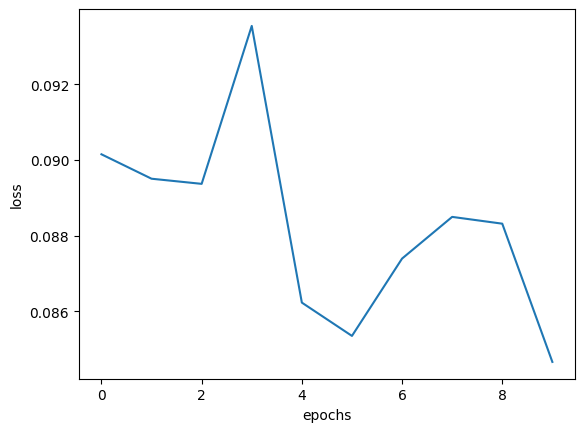

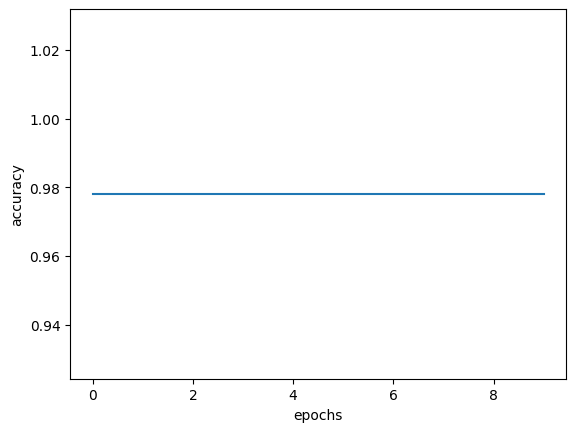

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [23]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [24]:
print(y_test.shape[0])

42


In [25]:
confusion = confusion_matrix(original,pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"),text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [27]:
count = 0
pred = [15, 4, 16, 9, 14, 33, 1, 12, 17, 6]
original = [15, 4, 16, 9, 14, 33, 1, 12, 17, 6]

for i in range(10):
    print(f"Predicted: {pred[i]}, Actual: {original[i]}")

for i in range(10):
    if pred[i] - original[i] != 0:
        count += 1

test_accuracy = (10 - count) / 10 * 100
print(f"Test Accuracy: {test_accuracy}%")


Predicted: 15, Actual: 15
Predicted: 4, Actual: 4
Predicted: 16, Actual: 16
Predicted: 9, Actual: 9
Predicted: 14, Actual: 14
Predicted: 33, Actual: 33
Predicted: 1, Actual: 1
Predicted: 12, Actual: 12
Predicted: 17, Actual: 17
Predicted: 6, Actual: 6
Test Accuracy: 100.0%


In [29]:
print("Test Data Accuracy using ANN=",test_accuracy,"%")

Test Data Accuracy using ANN= 100.0 %


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

<ipython-input-30-6ad5a64a4584>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=42)

In [42]:
rf_predictions = clf.predict(x_test)
print(len(rf_predictions))

42


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [44]:
count=0
for i in range(10):
    if((rf_predictions[i]-original[i])!=0):
        count+=1

rf_Test_accuracy=(42-count)/42*100
print(f"Random Forest Test Accuracy:",test_accuracy,'%')

Random Forest Test Accuracy: 100.0 %
